==== ERA5_hdsl_02_05S_37_43W_2004_2014_u_v_swh_r.nc ====
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2021-02-20 13:18:37 GMT by grib_to_netcdf-2.16.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -S param -o /cache/data3/adaptor.mars.internal-1613823764.610227-11800-7-14045a74-22dd-4a05-b12f-4bc2b3bf9547.nc /cache/tmp/14045a74-22dd-4a05-b12f-4bc2b3bf9547-adaptor.mars.internal-1613823764.6107574-11800-4-tmp.grib
    dimensions(sizes): longitude(25), latitude(13), time(16072)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time,latitude,longitude), int16 v10(time,latitude,longitude), int16 swh(time,latitude,longitude), int16 ssrd(time,latitude,longitude)
    groups: 

==== variáveis ====
longitude
latitude
time
u10
v10
swh
ssrd

==== tempos ====
 [ 911640  911646  911652 ... 1008054 1008060 1008066] 16072 items ( hours since 1900-01-01 0

<ipython-input-40-806764dc7cd0>:17: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(dataset)
<ipython-input-40-806764dc7cd0>:28: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print("\n==== tempos ====\n", times, dataset.variables["time"].size,"items (", dataset.variables["time"].units, ")")
<ipython-input-40-806764dc7cd0>:34: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print("lats({0}): ".format(dataset.variables["latitude"].units), lats)
<ipython-input-40-806764dc7cd0>:35: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print("lons({0}): ".format(dataset.variables["longitude"].units), lons)



==== média ssrd ====
0.0


<ipython-input-40-806764dc7cd0>:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar.ax.set_ylabel(dataset.variables[variable].units)



==== média ssrd ====
0.0


<ipython-input-40-806764dc7cd0>:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar.ax.set_ylabel(dataset.variables[variable].units)



==== média ssrd ====
1877040.0958194402


<ipython-input-40-806764dc7cd0>:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar.ax.set_ylabel(dataset.variables[variable].units)



==== média ssrd ====
2201797.279379291


<ipython-input-40-806764dc7cd0>:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar.ax.set_ylabel(dataset.variables[variable].units)



==== média swh ====
1.7346683482881948


<ipython-input-40-806764dc7cd0>:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar.ax.set_ylabel(dataset.variables[variable].units)



==== média swh ====
1.7260059397707923


<ipython-input-40-806764dc7cd0>:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar.ax.set_ylabel(dataset.variables[variable].units)



==== média swh ====
1.590597348543604


<ipython-input-40-806764dc7cd0>:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar.ax.set_ylabel(dataset.variables[variable].units)



==== média swh ====
1.4948710933580602


<ipython-input-40-806764dc7cd0>:87: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  color_bar.ax.set_ylabel(dataset.variables[variable].units)


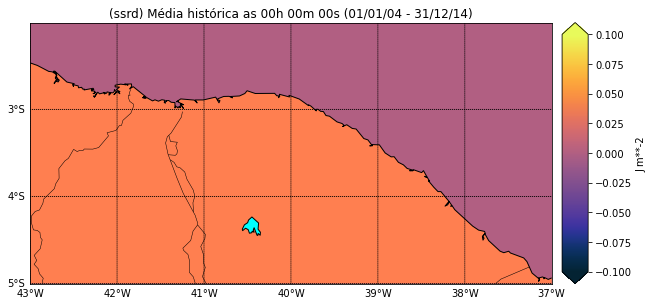

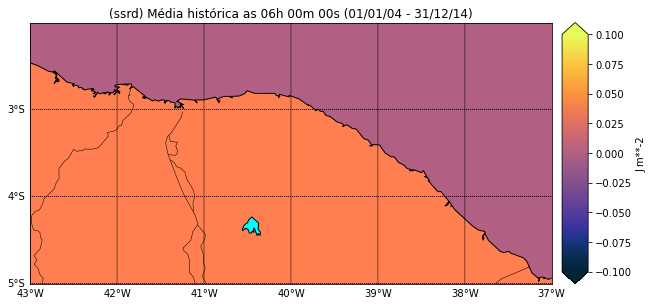

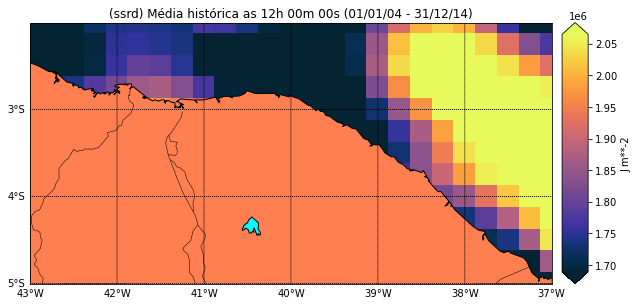

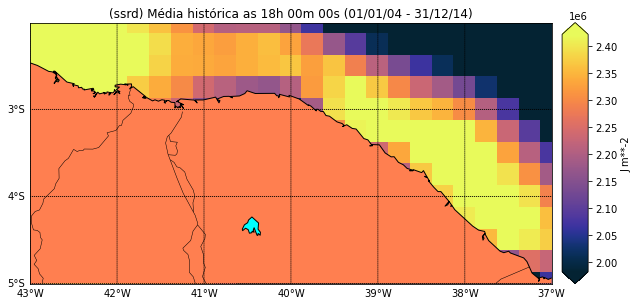

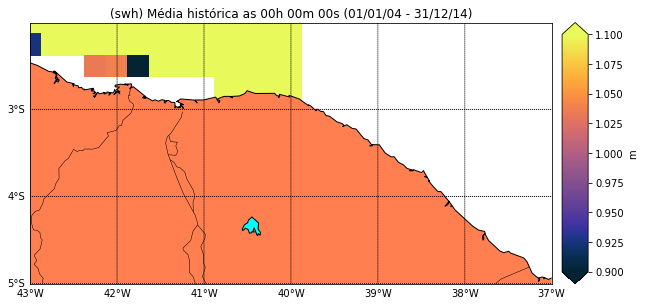

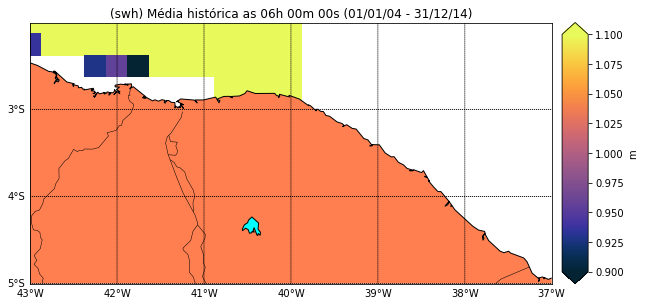

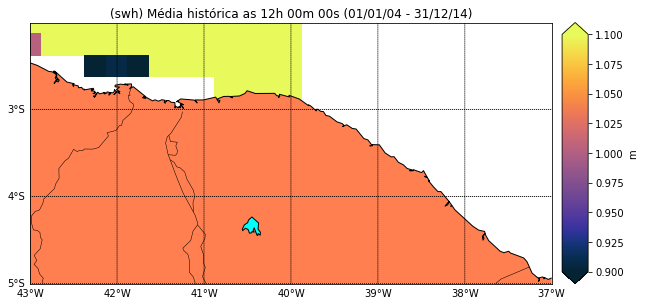

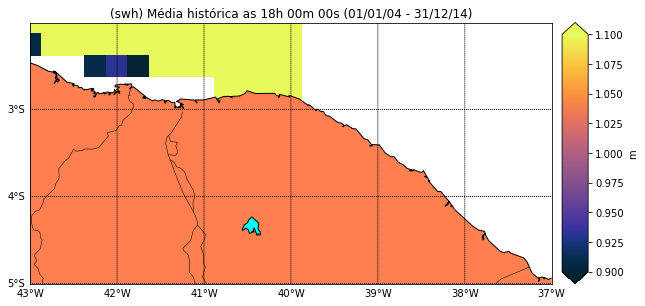

In [40]:
import os
import math
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cmocean as cmo

from datetime import datetime
from datetime import timedelta
from mpl_toolkits.basemap import Basemap

url = "ERA5_hdsl_02_05S_37_43W_2004_2014_u_v_swh_r.nc"

print("==== {} ====".format(url))
dataset = nc.Dataset(url, "r", format="NETCDF4" )
print(dataset)

print("\n==== variáveis ====")
for variable in dataset.variables:
    print("========")
    print(variable)

times = dataset.variables["time"][:]
initial_date = datetime(1900, 1, 1, 0, 0, 0, 0)
initial_time = initial_date + timedelta(hours=int(dataset.variables["time"][0]))
end_time = initial_date + timedelta(hours=int(dataset.variables["time"][-1]))
print("\n==== tempos ====\n", times, dataset.variables["time"].size,"items (", dataset.variables["time"].units, ")")
print("De {0} até {1}".format(initial_time, end_time))

lats = dataset.variables["latitude"][:]
lons = dataset.variables["longitude"][:]
print("\n==== latitudes e longitudes ====")
print("lats({0}): ".format(dataset.variables["latitude"].units), lats)
print("lons({0}): ".format(dataset.variables["longitude"].units), lons)

# 3x3 centered
# lon_min = lons[6:19].min()
# lon_max = lons[6:19].max()
lon_min = lons.min()
lon_max = lons.max()
lat_min = lats.min()
lat_max = lats.max()
print("\n==== corte ====")
print("lon(max -> min): ", lon_max, lon_min)
print("lat(max -> min): ", lat_max, lat_min)

hourMap = {
    0: "00h 00m 00s",
    1: "06h 00m 00s",
    2: "12h 00m 00s",
    3: "18h 00m 00s"
}

def generate_mean_matplot_for(variable):
    for i in range(4):
        plt.figure(figsize=(10, 10))
        mp = Basemap(projection="mill", llcrnrlon=lon_min, urcrnrlon=lon_max, llcrnrlat=lat_min, urcrnrlat=lat_max, resolution='i')

        mp.drawcoastlines()
        mp.drawstates()
        mp.drawcountries()
        mp.fillcontinents(color='coral', lake_color='aqua')
        plt.title("({3}) Média histórica as {2} ({0} - {1})".format(initial_time.strftime("%d/%m/%y"), end_time.strftime("%d/%m/%y"), hourMap[i], variable))

        mp.drawparallels(np.arange(lat_min, lat_max), labels=[1, 0, 0, 0])
        mp.drawmeridians(np.arange(lon_min, lon_max+.25), labels=[0, 0, 0, 1])

        lon, lat = np.meshgrid(lons, lats)
        x, y = mp(lon, lat)
        
        arr = np.squeeze(dataset.variables[variable][:])
        arr.reshape(int(dataset.variables["time"].size / 4), 4, 13, 25).mean(0)

        data = arr[i, :, :]

        average = np.average(data)
        print('\n==== média {0} ====\n{1}'.format(variable, average))

        upper_limit = average
        lower_limit = average

        color = cmo.cm.thermal
        color_scheme = mp.pcolormesh(x, y, data, cmap=color, shading='auto', vmin=math.floor(lower_limit), vmax=math.floor(upper_limit))

        color_bar = mp.colorbar(color_scheme, location='right', extend='both')
        color_bar.ax.set_ylabel(dataset.variables[variable].units)

        cur_dir = os.path.abspath('')
        new_path = cur_dir + '/maps_region_ERA5'
        if not os.path.exists(new_path): 
            os.makedirs(new_path)

            while True:
                if os.path.exists(new_path): 
                    break
                time.sleep(5)


        plt.savefig(new_path + '/MEDIA_HISTORICA_{0}-{1}-{2}_{3}'.format(variable, initial_time.strftime("%d%m%y"), end_time.strftime("%d%m%y"), i))

        
generate_mean_matplot_for("ssrd")
generate_mean_matplot_for("swh")

dataset.close()